# Import resources

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pathlib
import random

In [60]:
# Images data directories
image_dir_train = 'images/training'
image_dir_test = 'images/test'

# Step 1: Load the datasets and visualize

In [61]:
def load_dataset(image_dir):

    img_list = []
    img_types = ['day', 'night']

    for img_type in img_types:

        path = pathlib.Path(image_dir) / img_type

        for img_file in path.iterdir():

            img = cv2.imread(str(img_file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            if not img is None:
                img_list.append((img, img_type))

    return img_list

In [62]:
# load training data
data_train = load_dataset(image_dir_train)

In [63]:
def show_images(images, rows, cols):

    plt.figure(figsize=(15, 9))

    for row in range(rows):

        for col in range(cols):

            plt.subplot(rows, cols, row*cols+col+1)
            plt.title(f"Label [1 = day, 0 = night]: {images[row*cols+col][1]}")
            plt.imshow(images[row*cols+col][0])

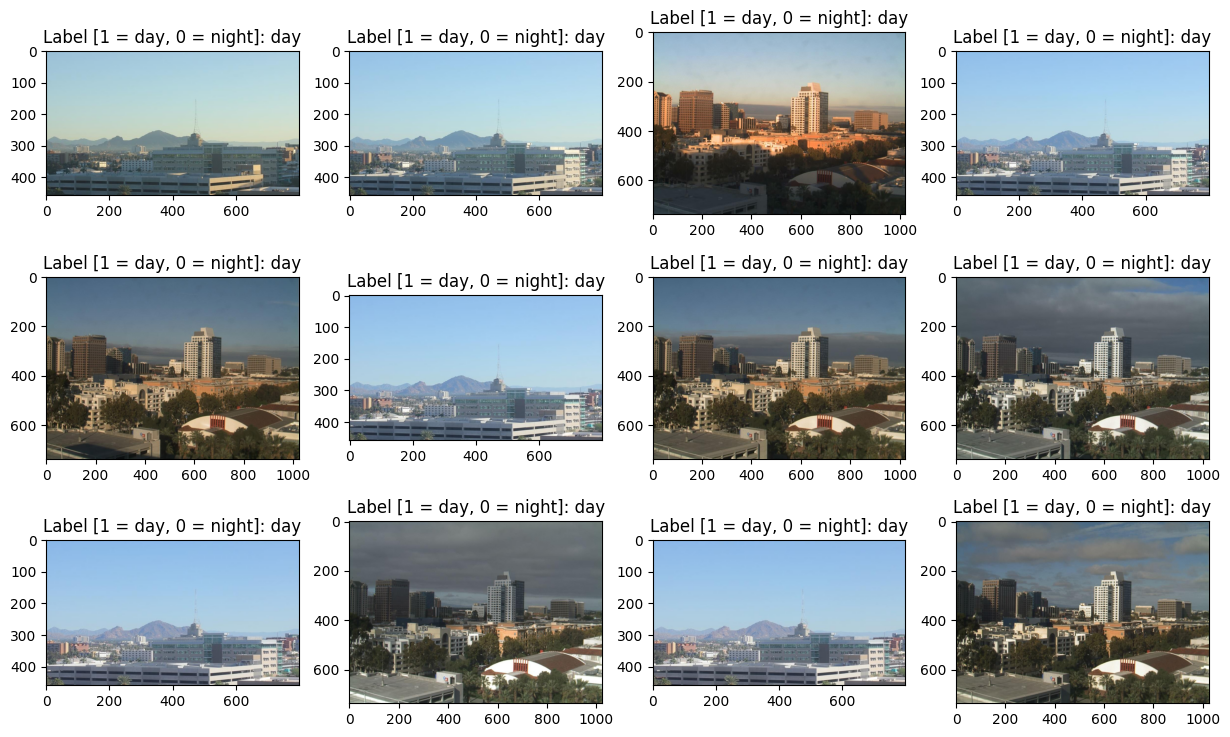

In [64]:
show_images(data_train, 3, 4)

# Step 2: Preprocess the data input images.

In [65]:
# determine the mean value of the images
images = [img[0].shape[:2] for img in data_train]
np.mean(images, axis=0)

array([565.33333333, 863.39583333])

In [66]:
def standardize_input(image):

    standard_img = cv2.resize(image, dsize=(863, 565))

    return standard_img

In [67]:
def encode(label):
    # day as 1, night as 0

    if label == 'day':
        return 1

    return 0

In [75]:
def preprocess(image_data):

    standard_data = []

    for item in image_data:

        img = item[0]
        label = item[1]

        standardize_img = standardize_input(img)

        binary_label = encode(label)

        standard_data.append((standardize_img, binary_label))

    return standard_data

In [77]:
standardized_data = preprocess(data_train)

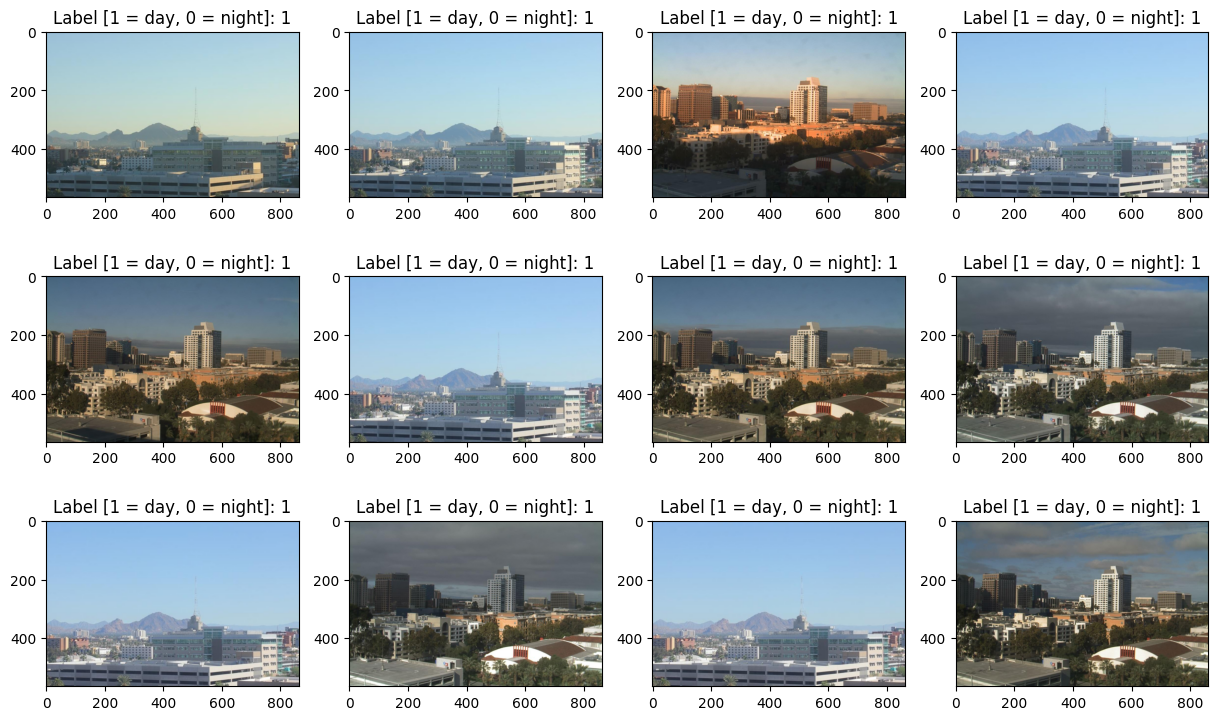

In [78]:
show_images(standardized_data, 3, 4)

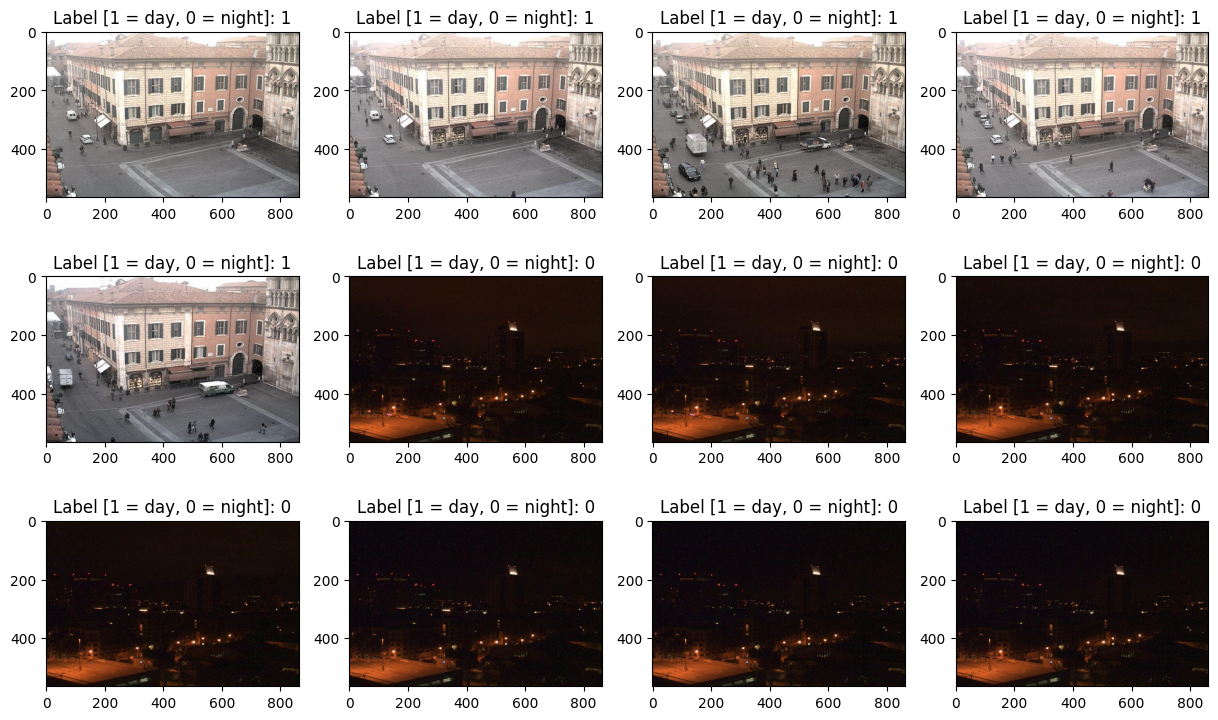

In [81]:
show_images(standardized_data[115:], 3, 4)

# Step 3: Feature Extraction

In [88]:
# We will find the mean brightness using HSV colorspace.

def mean_brightness(rgb_img):

    # convert image RGB to HSV
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

    sum_brightness = np.sum(hsv_img[:, :, 2]) # we need only V channel
    area = 863 * 565. # pixels

    # find the mean
    mean = sum_brightness / area # or mean = np.mean(hsv_img[:, :, 2])

    return mean

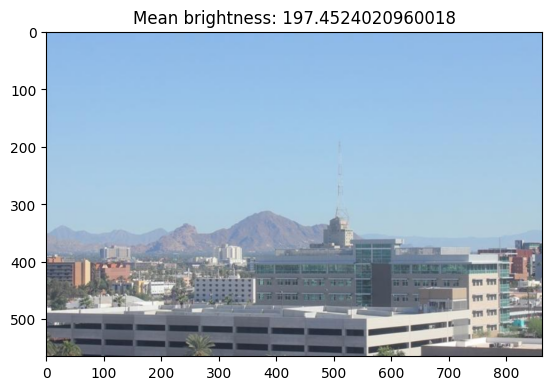

In [90]:
index = 10

test_img = standardized_data[index][0]

mean = mean_brightness(test_img)

plt.title(f"Mean brightness: {mean}")
plt.imshow(test_img)
plt.show()

# Step 4: Build the classifier

In [104]:
def average_means_brightness(rgb_images):
    means_bright = []

    for item in rgb_images:
        img = item[0]
        label = item[1]
        mean_bright = mean_brightness(img)
        means_bright.append(mean_bright)

    average_means_bright = np.mean(means_bright)

    return average_means_bright

In [100]:
def estimate_label(rgb_img, threshold):

    mean = mean_brightness(rgb_img)

    predicted_label = 0

    if mean > threshold:
        predicted_label = 1

    return predicted_label

In [105]:
threshold = average_means_brightness(standardized_data)

In [106]:
threshold

103.25115211736517

# Step 5: Evaluate the Classifier and Optimize

In [109]:
data_test = load_dataset(image_dir_test)

standardized_data_test = preprocess(data_test)

random.shuffle(standardized_data_test)

In [116]:
def get_misclassified_images(test_images, threshold):

    misclassified_images_labels = []

    for item in test_images:
        img = item[0]
        true_label = item[1]

        predicted_label = estimate_label(img, threshold)

        if predicted_label != true_label:

            misclassified_images_labels.append((img, predicted_label, true_label))

        return misclassified_images_labels

In [118]:
misclassified_images = get_misclassified_images(standardized_data_test, 120)

total = len(standardized_data_test)

total_correct = total - len(misclassified_images)

accuracy = total_correct / total

accuracy

1.0

In [119]:
misclassified_images

[]